In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
import skdsp.signal.discrete as ds
import numpy as np
import sympy as sp
import scipy as scip
from ipywidgets import interact, fixed
np.seterr(all='ignore')
PI = sp.S.Pi
pi = np.pi

## 1.- Un cero

In [38]:
def f1(b0=0, b1=0):
    omega = np.linspace(-pi, pi, 512, endpoint=True)
    H = b0 + b1*np.exp(-1j*omega)
    plt.figure(figsize=(20, 4))
    plt.subplot(1,3,1)
    plt.plot(omega, np.abs(H), 'b')
    plt.axis([omega[0], omega[-1], -0.1, 2.1])
    plt.axhline(0, color='k')
    plt.title('Respuesta en amplitud', size=14)
    plt.xlabel(r'$\omega$', size=18)
    plt.ylabel('amplitud', size=12)
    
    plt.subplot(1,3,2)
    pH = np.unwrap(np.angle(H))
    plt.plot(omega, pH, 'b')
    plt.axis([omega[0], omega[-1], -2*pi-0.1, pi+0.1])
    plt.axhline(0, color='k')
    plt.title('Respuesta en fase', size=14)
    plt.xlabel(r'$\omega$', size=18)
    plt.ylabel('fase (rad)', size=12)
    
    plt.subplot(1,3,3)
    omega, gd = scip.signal.group_delay(([b0, b1], 1), w=512, whole=True)
    gd = scip.fftpack.fftshift(gd)
    plt.plot(omega, gd, 'b')
    # plt.axis([omega[0], omega[-1], -2*pi-0.1, pi+0.1])
    plt.xlim([omega[0], omega[-1]])
    plt.axhline(0, color='k')
    plt.title('Retardo de grupo', size=14)
    plt.xlabel(r'$\omega$', size=18)
    plt.ylabel(r'$\tau$ (muestras)', size=12)

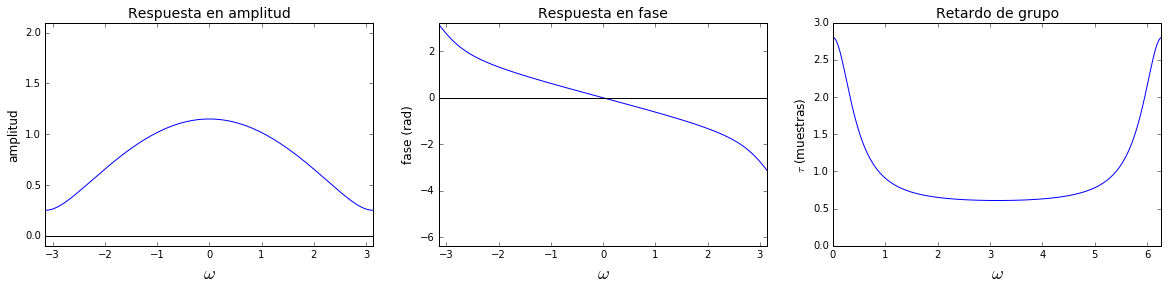

In [39]:
interact(f1, b0=(-1, 1, 0.05), b1=(-1, 1, 0.05))